# Очистка данных датасета Титаник

![Titanic](Titanic.jpg)

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from copy import deepcopy
from scipy import stats
from sklearn import preprocessing

## чтение данных из файла

In [10]:
dataset = pd.read_csv('titanic.csv')
dataset = dataset.rename(
    columns={
        'PassengerId': 'Пассажиры',
        'Survived': 'Выжившие',
        'Pclass': 'Класс',
        'Name': 'Имя',
        'Sex': 'Пол',
        'Age': 'Возраст',
        'SibSp': 'Кол-во братьев, сестер и т.д.',
        'Parch': 'Кол-во родителей, детей',
        'Ticket': 'Номер билета',
        'Fare': 'Плата',
        'Cabin': 'Каюта',
        'Embarked': 'Порт посадки'
    }
)

## Отсекание краев данных

In [11]:
dataset = dataset[(dataset["Плата"] < dataset["Плата"].quantile(0.9985)) & (dataset["Плата"] > dataset["Плата"].quantile(0.0015))]

In [12]:
dataset.dtypes

Пассажиры                          int64
Выжившие                           int64
Класс                              int64
Имя                               object
Пол                               object
Возраст                          float64
Кол-во братьев, сестер и т.д.      int64
Кол-во родителей, детей            int64
Номер билета                      object
Плата                            float64
Каюта                             object
Порт посадки                      object
dtype: object

# Z-стандартизация датасета титаник

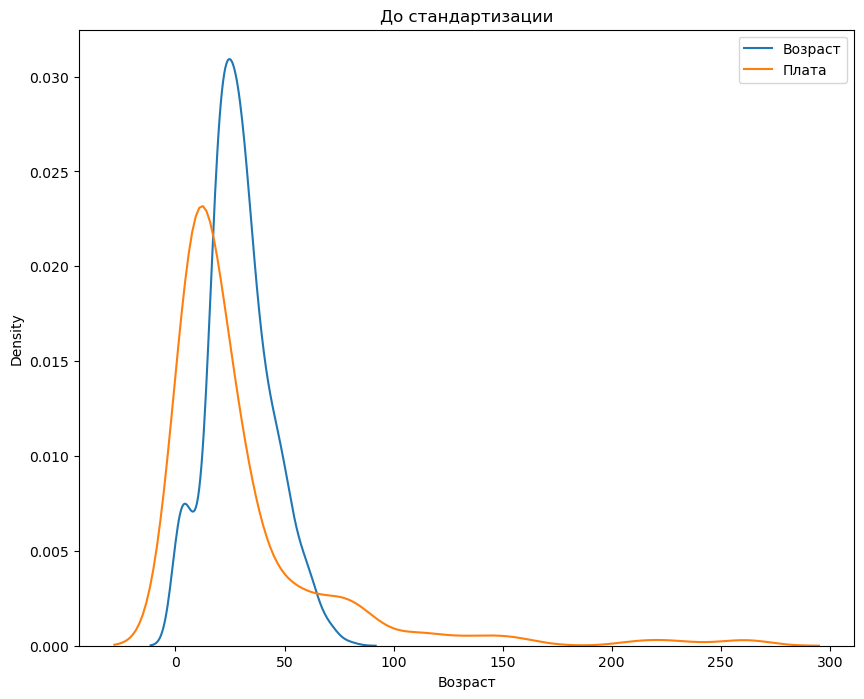

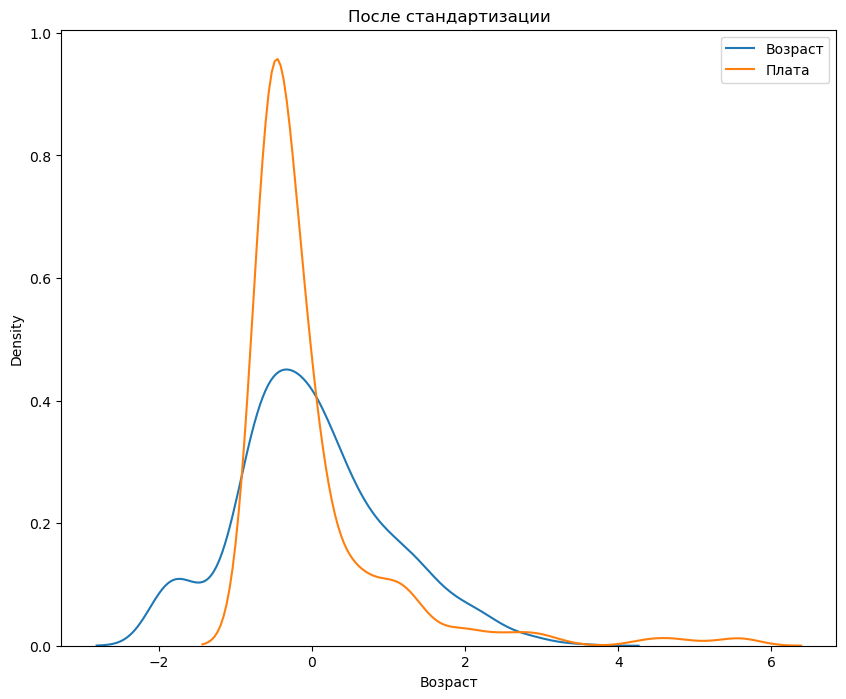

In [13]:
# z-стандартизация
fig, (ax1) = plt.subplots(ncols = 1, figsize = (10, 8))
ax1.set_title('До стандартизации')
# Выберем встретившиеся числовые типы
numerics = ['int64', 'float64']

# Создадим копию датасета
newdataset = dataset.select_dtypes(include = numerics)
# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(dataset['Возраст'], ax = ax1)
sns.kdeplot(dataset['Плата'], ax = ax1)
plt.legend(labels = ['Возраст','Плата'])
plt.show()
# Инициализируем стандартизатор
s_scaler = preprocessing.StandardScaler()

# Копируем исходный датасет
dataset_s = s_scaler.fit_transform(newdataset)

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(newdataset.columns)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
dataset_s = pd.DataFrame(dataset_s, columns = col_names)

# Расположим распределения на одном полотне
fig, (ax1) = plt.subplots(ncols = 1, figsize = (10, 8))

# Зададим название графика
ax1.set_title('После стандартизации')
sns.kdeplot(dataset_s['Возраст'], ax = ax1)
sns.kdeplot(dataset_s['Плата'], ax = ax1)
plt.legend(labels = ['Возраст','Плата'])
plt.show()

# Min-Max нормализация

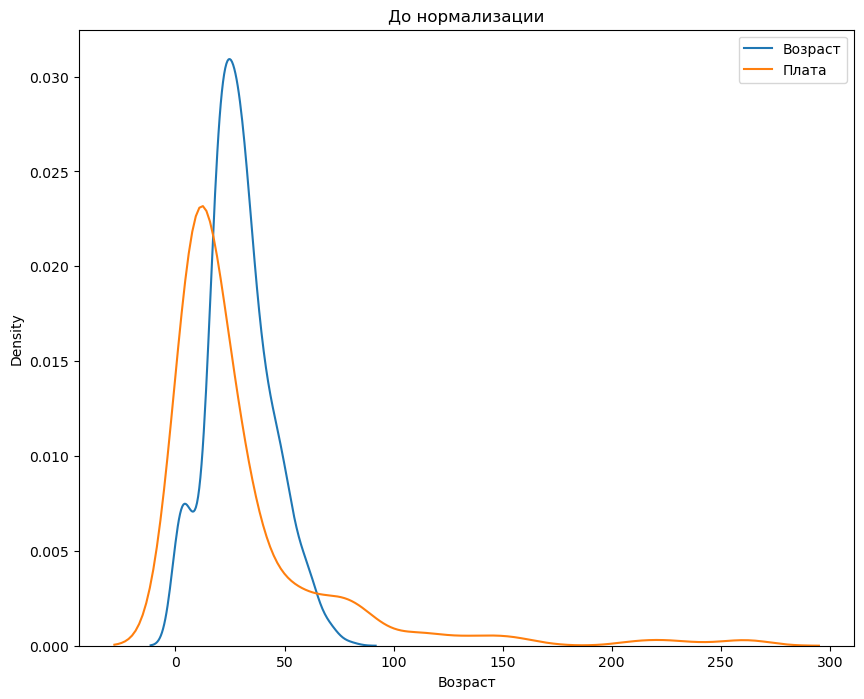

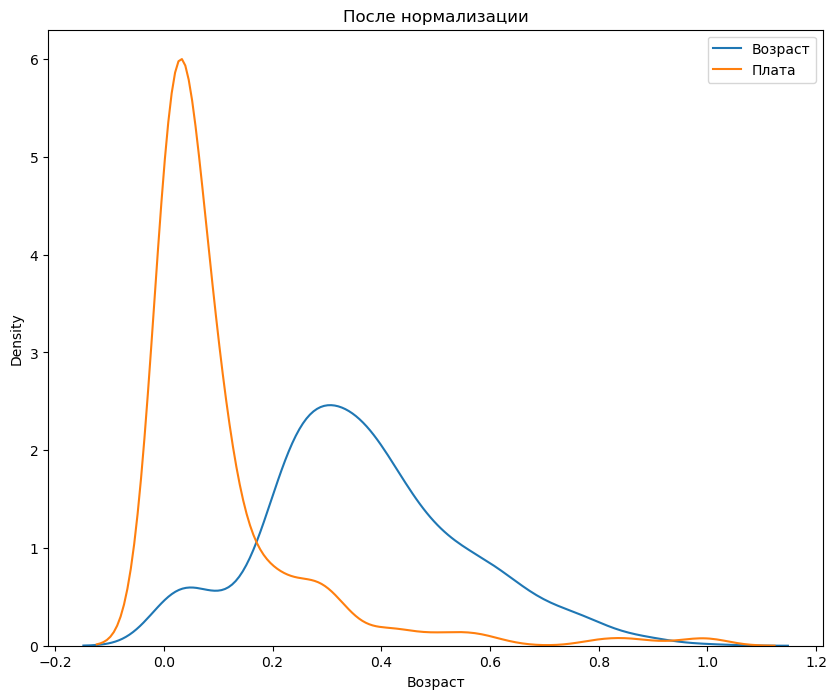

In [14]:
#Minmax нормализация
# Выберем встретившиеся числовые типы
numerics = ['int64', 'float64']
fig, (ax1) = plt.subplots(ncols = 1, figsize = (10, 8))
ax1.set_title('До нормализации')
sns.kdeplot(dataset['Возраст'], ax = ax1)
sns.kdeplot(dataset['Плата'], ax = ax1)
plt.legend(labels = ['Возраст','Плата'])
plt.show()
# Создадим копию датасета
newdataset = dataset.select_dtypes(include = numerics)
# Инициализация нормализатора
scaler = preprocessing.MinMaxScaler()

# Передача датасета и преобразование
scaler.fit(newdataset)
scaled_features = scaler.transform(newdataset)
col_names = list(newdataset.columns)
# Конвертация в табличный формат.
dataset_MinMax = pd.DataFrame(data = scaled_features,columns = col_names) 
# Расположим распределения на одном полотне
fig, (ax1) = plt.subplots(ncols = 1, figsize = (10, 8))
# Зададим название графика
ax1.set_title('После нормализации')

sns.kdeplot(dataset_MinMax['Возраст'], ax = ax1)
sns.kdeplot(dataset_MinMax['Плата'], ax = ax1)
plt.legend(labels = ['Возраст','Плата'])
plt.show()

# Регуляризации линейной регрессии
# L1 регуляризация
$$ L1=\sum\limits_{i=1}^n(y_i-y(t_i))+\lambda(\sum\limits_{i=1}^n|a_i|) $$